SLIAR

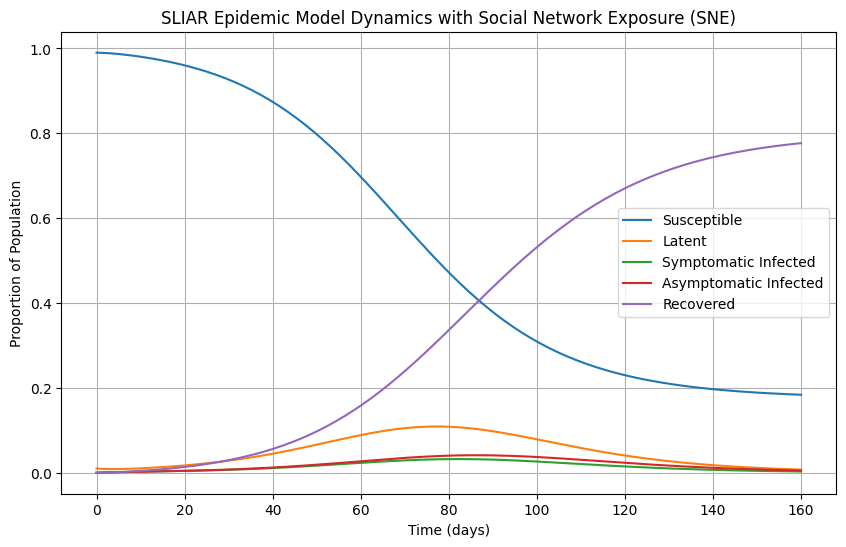

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SLIAR model with SNE
def SLIAR_model(y, t, beta, delta, kappa, alpha, p, f, eta, SNE):
    S, L, I, A, R = y

    # ODEs based on the model equations, including SNE
    dSdt = -beta * S * (I + delta * A) * SNE  # Incorporate SNE in the infection rate
    dLdt = beta * S * (I + delta * A) * SNE - kappa * L
    dIdt = p * kappa * L - alpha * I
    dAdt = (1 - p) * kappa * L - eta * A
    dRdt = f * alpha * I + eta * A

    return [dSdt, dLdt, dIdt, dAdt, dRdt]

# Parameters for the model
beta = 0.5    # Transmission rate
delta = 0.3   # Infectivity reduction rate for asymptomatic individuals
kappa = 0.1   # Transition rate from latent to infected
alpha = 0.2   # Recovery/removal rate for symptomatic infected
p = 0.6       # Proportion of latents becoming symptomatic
f = 0.95      # Proportion of symptomatic individuals who recover
eta = 0.1     # Recovery rate for asymptomatic individuals
SNE = 1     # Social Network Exposure factor (1.0 means full exposure)

# Initial conditions: S0, L0, I0, A0, R0
S0 = 0.99     # Initial susceptible population
L0 = 0.01     # Initial latent population
I0 = 0.0      # Initial symptomatic infected
A0 = 0.0      # Initial asymptomatic infected
R0 = 0.0      # Initial recovered population

# Time points for simulation
t = np.linspace(0, 160, 160)

# Initial conditions vector
y0 = [S0, L0, I0, A0, R0]

# Solve the ODE system
solution = odeint(SLIAR_model, y0, t, args=(beta, delta, kappa, alpha, p, f, eta, SNE))

# Extract the results
S, L, I, A, R = solution.T

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible')
plt.plot(t, L, label='Latent')
plt.plot(t, I, label='Symptomatic Infected')
plt.plot(t, A, label='Asymptomatic Infected')
plt.plot(t, R, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('SLIAR Epidemic Model Dynamics with Social Network Exposure (SNE)')
plt.legend()
plt.grid(True)
plt.show()


SNE change

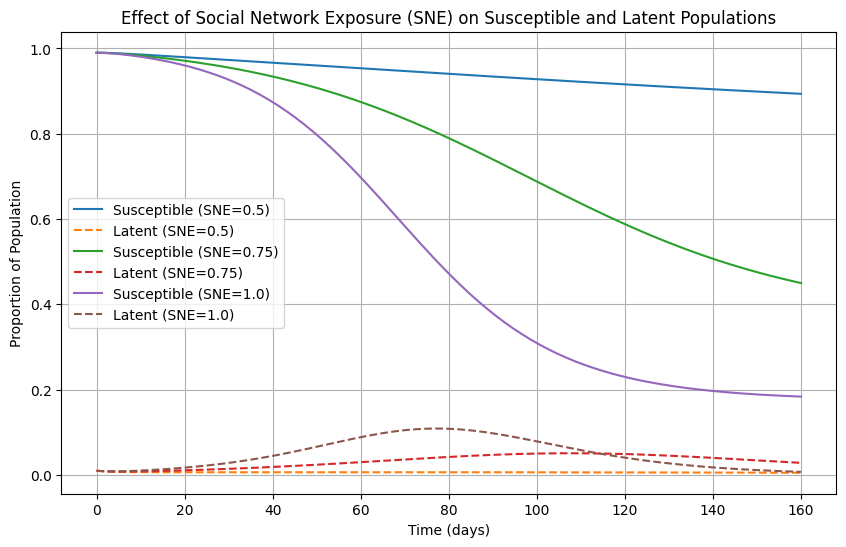

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the SLIAR model with SNE
def SLIAR_model(y, t, beta, delta, kappa, alpha, p, f, eta, SNE):
    S, L, I, A, R = y

    # ODEs based on the model equations, including SNE
    dSdt = -beta * S * (I + delta * A) * SNE  # Incorporate SNE in the infection rate
    dLdt = beta * S * (I + delta * A) * SNE - kappa * L
    dIdt = p * kappa * L - alpha * I
    dAdt = (1 - p) * kappa * L - eta * A
    dRdt = f * alpha * I + eta * A

    return [dSdt, dLdt, dIdt, dAdt, dRdt]

# Parameters for the model
beta = 0.5    # Transmission rate
delta = 0.3   # Infectivity reduction rate for asymptomatic individuals
kappa = 0.1   # Transition rate from latent to infected
alpha = 0.2   # Recovery/removal rate for symptomatic infected
p = 0.6       # Proportion of latents becoming symptomatic
f = 0.95      # Proportion of symptomatic individuals who recover
eta = 0.1     # Recovery rate for asymptomatic individuals

# Initial conditions: S0, L0, I0, A0, R0
S0 = 0.99     # Initial susceptible population
L0 = 0.01     # Initial latent population
I0 = 0.0      # Initial symptomatic infected
A0 = 0.0      # Initial asymptomatic infected
R0 = 0.0      # Initial recovered population

# Time points for simulation
t = np.linspace(0, 160, 160)

# SNE values to explore
SNE_values = [0.5, 0.75, 1.0]  # Example SNE values to test

# Prepare to plot results
plt.figure(figsize=(10, 6))

# Run the model for each SNE value
for SNE in SNE_values:
    # Initial conditions vector
    y0 = [S0, L0, I0, A0, R0]

    # Solve the ODE system
    solution = odeint(SLIAR_model, y0, t, args=(beta, delta, kappa, alpha, p, f, eta, SNE))

    # Extract the results
    S, L, I, A, R = solution.T

    # Plot susceptible and latent populations
    plt.plot(t, S, label=f'Susceptible (SNE={SNE})')
    plt.plot(t, L, linestyle='--', label=f'Latent (SNE={SNE})')

# Customize plot
plt.xlabel('Time (days)')
plt.ylabel('Proportion of Population')
plt.title('Effect of Social Network Exposure (SNE) on Susceptible and Latent Populations')
plt.legend()
plt.grid(True)
plt.show()
